### ANALISIS DE DATOS BIOLOGICOS CON MACHINE LEARNING

### Introducción

#### Justificación

#### Objetivo General

#### Objetivos Específicos

### Metodología.

#### Preparación de ambiente de trabajo

In [1]:
#Se importan las liberías a utilizar. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

#Para regresiones
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures as polynom
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA as RandomizedPCA

#librería para árboles de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

#librería para pre procesamiento
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

#libreria para random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#Metricas para clasificación
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

#knn
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

from funciones_1 import*

### Modelos de regresión.

####  Exploración y pre procesamiento de datos.

In [2]:
#Importamos la base
df = pd.read_csv('homa.csv')

In [3]:
#Revisamos el df
df.sample(10)

,Sex,Age,Tanner,Height,BMI,WC,TAGmgDL,HDLCmgDL,LDLCmgDL,SBP,DBP,Sedentary,Light,Moderate,Vigorous,HOMA
105,0,12.1,1,1.55,20.32,67.0,55,55,90,68,67,326.416667,273.809524,44.035714,14.178571,1.39
161,0,4.6,0,1.13,24.12,70.0,56,51,68,103,58,286.553571,385.508929,39.348214,6.669643,0.39
230,1,11.1,0,1.42,27.32,93.0,60,67,95,124,75,352.523810,336.857143,35.571429,18.261905,1.98
287,0,13.0,1,1.56,32.64,104.5,157,21,79,104,62,525.083333,211.095238,43.214286,16.416667,4.22
13,0,11.0,1,1.47,14.76,60.0,51,65,83,99,67,478.946429,243.196429,40.464286,18.178571,1.18
217,0,8.2,0,1.36,26.39,90.0,51,47,103,114,62,524.785714,264.875000,29.767857,6.035714,0.87
201,1,9.9,1,1.51,25.61,85.0,59,44,63,111,61,417.059524,193.452381,21.559524,45.214286,0.82
189,0,9.4,0,1.38,25.25,75.0,44,49,96,113,62,398.023810,227.345238,45.000000,9.011905,2.05
151,0,11.5,1,1.56,23.33,85.0,113,55,99,118,85,413.285714,283.773810,29.952381,3.630952,1.98
86,0,13.0,1,1.45,18.74,69.0,87,64,122,103,70,583.119048,226.940476,45.059524,16.964286,1.83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         292 non-null    int64  
 1    Age        292 non-null    float64
 2    Tanner     292 non-null    int64  
 3    Height     292 non-null    float64
 4    BMI        292 non-null    float64
 5    WC         292 non-null    float64
 6    TAGmgDL    292 non-null    int64  
 7    HDLCmgDL   292 non-null    int64  
 8    LDLCmgDL   292 non-null    int64  
 9    SBP        292 non-null    int64  
 10   DBP        292 non-null    int64  
 11   Sedentary  292 non-null    float64
 12   Light      292 non-null    float64
 13   Moderate   292 non-null    float64
 14   Vigorous   292 non-null    float64
 15   HOMA       292 non-null    float64
dtypes: float64(9), int64(7)
memory usage: 36.6 KB


In [5]:
df.isnull().sum()

Sex           0
 Age          0
 Tanner       0
 Height       0
 BMI          0
 WC           0
 TAGmgDL      0
 HDLCmgDL     0
 LDLCmgDL     0
 SBP          0
 DBP          0
 Sedentary    0
 Light        0
 Moderate     0
 Vigorous     0
 HOMA         0
dtype: int64

##### Inspección de variables

In [6]:
#Atributos o variables
df.shape

(292, 16)

In [7]:
df.describe() #Variables continuas y discretas

,Sex,Age,Tanner,Height,BMI,WC,TAGmgDL,HDLCmgDL,LDLCmgDL,SBP,DBP,Sedentary,Light,Moderate,Vigorous,HOMA
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.496575,10.171918,0.332192,1.413836,22.657500,77.352740,62.297945,53.383562,97.486301,107.787671,64.263699,466.729309,252.948661,38.493844,15.018193,1.627500
std,0.500847,2.384925,0.471808,0.141172,5.394935,15.798076,30.355119,14.544521,26.485485,13.168070,9.237362,85.826327,55.902240,13.636752,10.269178,1.055574
min,0.000000,3.100000,0.000000,1.000000,11.340000,46.300000,20.000000,21.000000,39.000000,68.000000,41.000000,279.660714,77.166667,6.303571,1.095238,0.120000
25%,0.000000,8.275000,0.000000,1.317500,17.695000,64.000000,42.750000,43.000000,80.000000,99.000000,59.000000,407.928571,216.029762,28.982143,7.163690,0.925000
50%,0.000000,10.300000,0.000000,1.410000,23.070000,76.250000,55.000000,51.000000,96.000000,108.000000,64.000000,458.154762,256.223215,37.383928,12.770833,1.425000
75%,1.000000,12.000000,1.000000,1.510000,26.400000,90.625000,73.000000,62.000000,112.250000,116.000000,70.000000,514.648810,287.375000,46.633929,18.868304,2.052500
max,1.000000,15.800000,1.000000,1.770000,35.410000,117.000000,254.000000,100.000000,184.000000,156.000000,118.000000,767.892857,402.476190,75.178571,64.119048,8.990000


##### Visualización de atributos

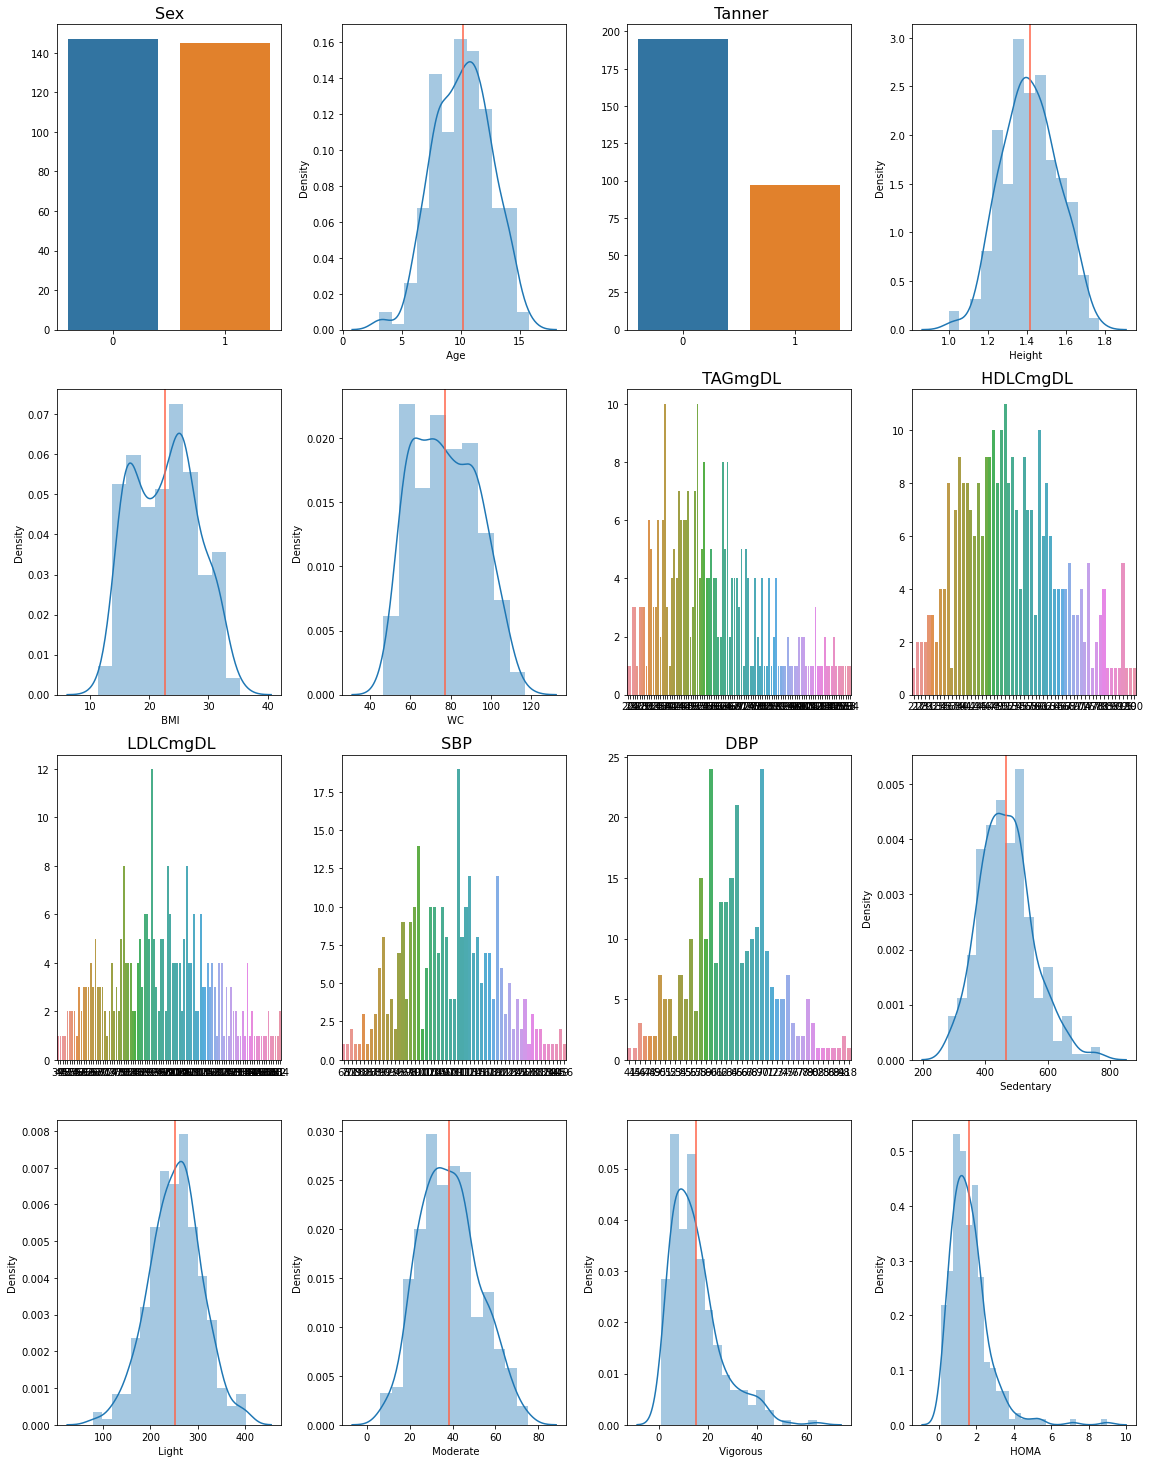

In [8]:
grafico_atr(df)

In [9]:
# se saca el espacio en el nombre de la variable
df.columns = df.columns.str.replace(' ', '')

In [10]:
df['HOMA'].describe() # descripción de vector a predecir

count    292.000000
mean       1.627500
std        1.055574
min        0.120000
25%        0.925000
50%        1.425000
75%        2.052500
max        8.990000
Name: HOMA, dtype: float64

#### Modelación descriptiva (Regresión lineal)

In [11]:
#Para guardar regresores
lista1 = []
for n, i in enumerate(df):
    #se saca vector objetivo
    if (i !='HOMA' and df[i].dtypes):
        lista1.append(i)
v_independientes = "+".join(lista1)
v_independientes

'Sex+Age+Tanner+Height+BMI+WC+TAGmgDL+HDLCmgDL+LDLCmgDL+SBP+DBP+Sedentary+Light+Moderate+Vigorous'

In [12]:
modelo_saturado = smf.ols('HOMA ~ '+v_independientes, data=df)
modelo_saturado = modelo_saturado.fit()
modelo_saturado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.488   
Dependent Variable: HOMA             AIC:                680.5536
Date:               2023-05-02 15:20 BIC:                739.3816
No. Observations:   292              Log-Likelihood:     -324.28 
Df Model:           15               F-statistic:        19.46   
Df Residuals:       276              Prob (F-statistic): 4.07e-35
R-squared:          0.514            Scale:              0.57095 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.9193    0.9464  -6.2547  0.0000  -7.7823  -4.0563
Sex            0.3046    0.0962   3.1675  0.0017   0.1153   0.4940
Age            0.0056    0.0431   0.1301  0.8966  -0.0793   0.0906
Tanner         0.1346    0.1353   0.9947  0.3208  -0.1318   0.4009
Height         2.4506    0.7621   3.2155  0.0015   0.9503   3.9508
BMI            0.1456    0.0229   6.3704  0.0000   0.1006   0.1906
WC            -0.0247    0.0087  -2.8575  0.0046  -0.0418  -0.0077
TAGmgDL        0.0072    0.0017   4.3520  0.0000   0.0040   0.0105
HDLCmgDL       0.0082    0.0041   2.0288  0.0434   0.0002   0.0162
LDLCmgDL      -0.0031    0.0018  -1.7718  0.0775  -0.0066   0.0003
SBP            0.0041    0.0044   0.9369  0.3496  -0.0045   0.0127
DBP            0.0086    0.0055   1.5806  0.1151  -0.0021   0.0194
Sedentary      0.0010    0.0006   1.6993  0.0904  -0.0002   0.0022
Light          0.0013    0.0011   1.2168  0.2247  -0.0008   0.0034
Moderate       0.0038    0.0048   0.8000  0.4244  -0.0056   0.0132
Vigorous      -0.0057    0.0058  -0.9847  0.3256  -0.0170   0.0057
-----------------------------------------------------------------
Omnibus:             119.628      Durbin-Watson:         1.429   
Prob(Omnibus):       0.000        Jarque-Bera (JB):      1007.989
Skew:                1.430        Prob(JB):              0.000   
Kurtosis:            11.641       Condition No.:         14249   
=================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [13]:
v_independientes2 = ['Sex', 'Height', 'BMI', 'WC' , 'TAGmgDL', 'HDLCmgDL']
v_independientes2

['Sex', 'Height', 'BMI', 'WC', 'TAGmgDL', 'HDLCmgDL']

In [14]:
variables_independientes2 = "+".join(v_independientes2)
variables_independientes2

'Sex+Height+BMI+WC+TAGmgDL+HDLCmgDL'

In [15]:
modelo_depurado = smf.ols('HOMA ~ '+variables_independientes2, data=df)
modelo_depurado = modelo_depurado.fit()
modelo_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.478   
Dependent Variable: HOMA             AIC:                677.3424
Date:               2023-05-02 15:20 BIC:                703.0797
No. Observations:   292              Log-Likelihood:     -331.67 
Df Model:           6                F-statistic:        45.41   
Df Residuals:       285              Prob (F-statistic): 7.59e-39
R-squared:          0.489            Scale:              0.58165 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.9568    0.5960  -8.3165  0.0000  -6.1299  -3.7836
Sex            0.3145    0.0914   3.4426  0.0007   0.1347   0.4944
Height         2.7566    0.4164   6.6207  0.0000   1.9371   3.5761
BMI            0.1633    0.0220   7.4203  0.0000   0.1200   0.2066
WC            -0.0270    0.0084  -3.2008  0.0015  -0.0436  -0.0104
TAGmgDL        0.0067    0.0016   4.1511  0.0000   0.0035   0.0098
HDLCmgDL       0.0095    0.0040   2.3611  0.0189   0.0016   0.0174
-----------------------------------------------------------------
Omnibus:              115.739      Durbin-Watson:         1.408  
Prob(Omnibus):        0.000        Jarque-Bera (JB):      875.342
Skew:                 1.410        Prob(JB):              0.000  
Kurtosis:             11.000       Condition No.:         1750   
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

#### Modelación predictiva (Regresión lineal)

In [16]:
# se separan atributos regresores y vector objetivo en X e y respectivamente
y= df['HOMA']
X= df.drop(columns='HOMA')


In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1121)

In [18]:
X_train.head()

,Sex,Age,Tanner,Height,BMI,WC,TAGmgDL,HDLCmgDL,LDLCmgDL,SBP,DBP,Sedentary,Light,Moderate,Vigorous
232,0,12.5,0,1.39,27.40,92.0,63,69,76,110,63,672.333333,207.035714,22.023810,7.964286
153,1,8.2,0,1.27,23.41,78.5,45,53,94,119,65,454.130952,219.595238,42.690476,9.440476
90,0,8.0,0,1.20,18.83,64.0,44,64,108,110,56,315.452381,402.261905,47.642857,12.869048
15,1,11.1,0,1.39,14.77,54.1,52,68,115,106,70,595.848214,163.089286,20.258929,10.116071
46,1,7.4,0,1.24,16.43,55.1,53,51,74,117,64,428.000000,327.214286,53.321429,17.904762


In [19]:
#Con intercepto
#Instanciamos el modelo
lm1 = linear_model.LinearRegression(fit_intercept=True)
#Entrenamos. Ajustamos el modelo a los datos de entrenamiento
lm1.fit(X_train, y_train)

LinearRegression()

In [20]:
#Prediccion de la matriz de prueba
y_pred0 = lm1.predict(X_test)
#Las predicciones de X_test realizadas con nuestra función las guardamos en un nuevo objeto llamado y_pred0

In [21]:
#Metricas del modelo
report_scores(y_pred0, y_test)

Error cuadrático medio:  0.498 R2:  0.399


In [22]:
fetch_features(df, 'HOMA')

,corr,abs_corr
attribute,,
BMI,0.589953,0.589953
WC,0.542402,0.542402
Height,0.481617,0.481617
SBP,0.406737,0.406737
Age,0.395540,0.395540
Tanner,0.380832,0.380832
TAGmgDL,0.307163,0.307163
HDLCmgDL,-0.300899,0.300899
DBP,0.275666,0.275666


In [23]:
var=['BMI', 'WC', 'Height', 'SBP', 'Age', 'Tanner' , 'TAGmgDL','HDLCmgDL','DBP']
var

['BMI', 'WC', 'Height', 'SBP', 'Age', 'Tanner', 'TAGmgDL', 'HDLCmgDL', 'DBP']

In [24]:
varcor=df.loc[:,var]
varcor

,BMI,WC,Height,SBP,Age,Tanner,TAGmgDL,HDLCmgDL,DBP
0,11.34,60.0,1.55,97,9.5,0,55,51,60
1,12.40,46.3,1.15,90,8.0,0,51,70,55
2,12.99,67.5,1.42,96,10.5,0,65,60,54
3,13.43,53.1,1.27,108,8.1,0,41,78,46
4,13.72,51.9,1.32,107,10.4,0,39,100,69
...,...,...,...,...,...,...,...,...,...
287,32.64,104.5,1.56,104,13.0,1,157,21,62
288,32.70,110.0,1.61,112,12.5,0,79,44,79
289,34.05,104.0,1.69,127,14.1,1,128,39,68
290,34.48,111.0,1.77,149,15.3,1,88,42,70


In [25]:
# Se vuelve separar la data para el modelo con las variables con mayor correlación
X_train2, X_test2, y_train2, y_test2 = train_test_split(varcor, y, test_size=0.33, random_state=1121)

In [26]:
#Con intercepto
#Instanciamos el modelo
lm2 = linear_model.LinearRegression(fit_intercept=True)
#Entrenamos
lm2.fit(X_train2, y_train2)
#Predecimos en  test
#Prediccion de la matriz de prueba
y_pred1 = lm2.predict(X_test2)

In [27]:
#Las metricas para este modelo son.

report_scores(y_pred1, y_test2)

Error cuadrático medio:  0.493 R2:  0.406


In [28]:
Metricas_lm2=metricas(lm2, X_test2, y_test2)

Test MSE: 0.49262
Test MAE: 0.50715
Test R2: 0.40581


#### Support Vector Regressor

In [29]:
svr = SVR(kernel="linear", C=1.0)
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [30]:
y_pred2 = svr.predict(X_test)

In [31]:
report_scores(y_pred2, y_test)

Error cuadrático medio:  0.482 R2:  0.418


In [32]:
Metricas_svr=metricas(svr, X_test, y_test)

Test MSE: 0.4821
Test MAE: 0.40514
Test R2: 0.4185


#### Árboles de decisión Regresión

In [33]:
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [34]:
y_pred3=dec_tree.predict(X_test)

In [35]:
report_scores(y_pred3, y_test)

Error cuadrático medio:  0.8 R2:  0.035


In [36]:
Metricas_dec_tree=metricas(dec_tree, X_test, y_test)

Test MSE: 0.8001
Test MAE: 0.57
Test R2: 0.03493


#### Random Forest Regressor

In [37]:
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
y_pred4 = rforest.predict(X_test)

In [39]:
report_scores(y_pred4, y_test)

Error cuadrático medio:  0.444 R2:  0.465


In [40]:
Metricas_rforest=metricas(rforest, X_test, y_test)

Test MSE: 0.4439
Test MAE: 0.4371
Test R2: 0.46457


##### Comparación de modelos obtenidos

In [41]:
df_metricas=pd.concat([Metricas_lm2,
        Metricas_svr,
        Metricas_dec_tree,
        Metricas_rforest] ,  axis = 0 ).reset_index()
df_metricas
ids = pd.DataFrame({'Modelo' : [
        "Linear Regression",
        "Support Vector Regressor",
        "Árboles de decisión Regresión",
        "Random Forest"]}, columns = ['Modelo'])
Metricas_modelos = ids.join(df_metricas).drop(columns='index')
Metricas_modelos 

,Modelo,Test_MSE,Test_MAE,Test_R2
0,Linear Regression,0.49262,0.50715,0.40581
1,Support Vector Regressor,0.48210,0.40514,0.41850
2,Árboles de decisión Regresión,0.80010,0.57000,0.03493
3,Random Forest,0.44390,0.43710,0.46457


### Modelos de clasificación.

In [42]:
genes = pd.read_csv('inmune_X50.csv') # Conjunto de genes o atributos

In [43]:
vector = pd.read_csv('inmune_Y.csv') # Variable objetivo a predecir

In [44]:
genes.head() # datos de expresión de genes.

,Unnamed: 0,COL2A1,RXRG,CCL19,SSX1,CST2,PRSS33,CDH2,SCUBE2,TMPRSS13,...,UBASH3A,GBP4,PRF1,PTK6,PCDHB2,GSDMA,DIO2,PLIN1,NCF1C,SLC7A11
0,0,-1.431141,-7.845756,0.665118,-1.409304,-2.537396,-1.676281,1.529957,-0.895042,-0.298778,...,-0.659997,-1.469602,-0.570793,1.047635,-2.068966,-0.202828,-0.506767,1.285256,-0.901222,2.483020
1,1,-0.424374,-8.352423,0.386055,-2.846138,-0.685105,0.339787,-3.488043,-0.584982,5.679815,...,0.190202,-0.282190,0.375094,0.261662,3.356282,2.028145,-2.399010,-1.152801,0.662490,-2.914991
2,2,11.014251,0.415549,-1.633781,0.315442,-0.662332,-0.498761,0.535811,-0.467456,-2.818738,...,-0.816305,-0.316202,-1.153745,-2.284201,-1.761597,-0.746975,-2.988195,-1.976877,-1.400889,-2.266779
3,3,-1.180446,-8.187415,-1.958023,5.061146,-2.603744,-0.666706,0.456460,-4.609624,-1.713164,...,0.214344,-0.327110,0.476764,1.153275,-0.337649,-1.006765,-2.686648,-1.329148,0.055994,-2.652313
4,4,0.816312,-1.189303,4.837235,4.972176,-2.963715,-2.665721,-0.268042,-1.740607,0.011610,...,3.352734,2.145368,3.358865,-2.324389,-1.741669,0.734312,-1.649316,6.284688,1.450729,1.131275


In [45]:
genes = genes.drop(columns='Unnamed: 0') # se elimina columna sin nombre

In [46]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COL2A1    336 non-null    float64
 1   RXRG      336 non-null    float64
 2   CCL19     336 non-null    float64
 3   SSX1      336 non-null    float64
 4   CST2      336 non-null    float64
 5   PRSS33    336 non-null    float64
 6   CDH2      336 non-null    float64
 7   SCUBE2    336 non-null    float64
 8   TMPRSS13  336 non-null    float64
 9   TRPM8     336 non-null    float64
 10  DNASE2B   336 non-null    float64
 11  GAP43     336 non-null    float64
 12  IRX6      336 non-null    float64
 13  SLC24A4   336 non-null    float64
 14  SPATS1    336 non-null    float64
 15  C3        336 non-null    float64
 16  PRODH     336 non-null    float64
 17  FCRLA     336 non-null    float64
 18  NTS       336 non-null    float64
 19  GAL3ST1   336 non-null    float64
 20  ARHGEF4   336 non-null    float6

In [47]:
genes.isnull().sum()

COL2A1      0
RXRG        0
CCL19       0
SSX1        0
CST2        0
PRSS33      0
CDH2        0
SCUBE2      0
TMPRSS13    0
TRPM8       0
DNASE2B     0
GAP43       0
IRX6        0
SLC24A4     0
SPATS1      0
C3          0
PRODH       0
FCRLA       0
NTS         0
GAL3ST1     0
ARHGEF4     0
CDH19       0
COCH        0
ATP1A2      0
CYSLTR2     0
SOX9        0
SV2A        0
CXADR       0
AK5         0
PPAP2C      0
DPT         0
GNAL        0
LTB         0
SYT1        0
CRYAB       0
PLIN4       0
LEPREL1     0
BMP8B       0
LHFPL3      0
SNHG14      0
UBASH3A     0
GBP4        0
PRF1        0
PTK6        0
PCDHB2      0
GSDMA       0
DIO2        0
PLIN1       0
NCF1C       0
SLC7A11     0
dtype: int64

In [48]:
vector.info() # Vector objetivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 336 non-null    int64 
 1   RNASEQ-CLUSTER_CONSENHIER  336 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [49]:
vector= vector.drop(columns='Unnamed: 0') # se elimina columna sin nombre

In [50]:
vector.head()

,RNASEQ-CLUSTER_CONSENHIER
0,immune
1,MITF-low
2,MITF-low
3,immune
4,immune


In [51]:
# se renombra columna
vector=vector.rename(columns={"RNASEQ-CLUSTER_CONSENHIER":"RNASEQ"})

In [52]:
variables_insp(vector) # Se insepcciona variable categorica objetivo


 RNASEQ
immune      168
MITF-low    168
Name: RNASEQ, dtype: int64


In [53]:
#se establece X e y para modelos de clasificación
Xc, yc = genes, vector

In [54]:
#RNASEQ debe recodificarse de forma binaria. ()
yc['RNASEQ'] = np.where(yc['RNASEQ'] == 'MITF-low', 1, 0)

#### Regresión logística

##### Modelación predictiva

In [55]:
#Se segmentar nuestra base de datos en entrenamiento y pruebas siguiendo la nomenclatura clásica, guardando el 33% de la muestra,
#una semilla pseudoaleatoria con random_state para asegurar replicabilidad de los resultados.

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.33, random_state=1511)

In [56]:
# estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(Xc_train)

# estandarizamos la matriz de pruebas ( se usa para generar la prediccion de las clases)
X_test_std = StandardScaler().fit_transform(Xc_test)


In [57]:
default_model = LogisticRegression(random_state=1511).fit(X_train_std, yc_train)

In [58]:
#predicción de las clases
yhat = default_model.predict(X_test_std)

In [59]:
#predicción de probabilidad.
yhat_prob = default_model.predict_proba(X_test_std)

In [60]:
#exactitud de nuestro modelo
m1_acc = accuracy_score(yc_test, yhat)
round(m1_acc,2)

0.77

In [61]:
mc1=classification_report(yc_test, yhat)
print(mc1)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        56
           1       0.74      0.82      0.78        55

    accuracy                           0.77       111
   macro avg       0.77      0.77      0.77       111
weighted avg       0.77      0.77      0.77       111



##### Máquinas de Soporte Vectorial

In [62]:
#instanciamos un pipeline con StandarScaler
#sobre la máquina de soporte vectorial
pipeline_svc_rbf  = Pipeline([
('scaler', StandardScaler()),
('svc', SVC(kernel='linear'))
])

In [63]:
pipeline_svc_rbf.fit(Xc_train, yc_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [64]:
# el objeto creado puede utilizarse con los siguientes métodos
y_hatsvc = pipeline_svc_rbf.predict(Xc_test)

In [65]:
#exactitud de nuestro modelo
m2_acc = accuracy_score(yc_test, y_hatsvc)
round(m2_acc,2)

0.77

In [66]:
mc2=classification_report(yc_test, y_hatsvc)
print(mc2)

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        56
           1       0.73      0.85      0.79        55

    accuracy                           0.77       111
   macro avg       0.78      0.78      0.77       111
weighted avg       0.78      0.77      0.77       111



#### K-Nearest Neighbors (KNN) clasificación 

In [67]:
# Se escala los grupos de entrenamiento y test
scaler = StandardScaler()
Xc_trainknn = scaler.fit_transform(Xc_train)
Xc_testknn = scaler.transform(Xc_test)

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xc_trainknn, yc_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
yc_predknn = knn.predict(Xc_testknn)

In [70]:
#exactitud de nuestro modelo
m3_acc = accuracy_score(yc_test, yc_predknn)
round(m3_acc,2)

0.69

In [71]:
mc3=classification_report(yc_test, yc_predknn)
print(mc3)

              precision    recall  f1-score   support

           0       0.96      0.41      0.57        56
           1       0.62      0.98      0.76        55

    accuracy                           0.69       111
   macro avg       0.79      0.70      0.67       111
weighted avg       0.79      0.69      0.67       111



In [72]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, Xc, yc, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

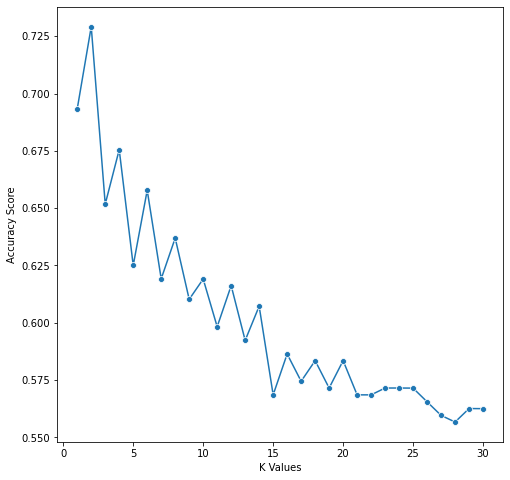

In [73]:
# se grafica el mejor k
plt.rcParams['figure.figsize']=(8, 8)
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [74]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
best_k
knn_r = KNeighborsClassifier(n_neighbors=best_k)
knn_r.fit(Xc_trainknn, yc_train)

KNeighborsClassifier(n_neighbors=2)

In [75]:
y_predknn2 = knn_r.predict(Xc_testknn)

In [76]:
#modelo reentrenado
mc3_1=classification_report(yc_test, y_predknn2)
print(mc3_1)

              precision    recall  f1-score   support

           0       0.88      0.50      0.64        56
           1       0.65      0.93      0.76        55

    accuracy                           0.71       111
   macro avg       0.76      0.71      0.70       111
weighted avg       0.76      0.71      0.70       111



In [77]:
# modelo anterior
print(mc3)

              precision    recall  f1-score   support

           0       0.96      0.41      0.57        56
           1       0.62      0.98      0.76        55

    accuracy                           0.69       111
   macro avg       0.79      0.70      0.67       111
weighted avg       0.79      0.69      0.67       111



#### Random Forest Classification

In [78]:
rf_class = RandomForestClassifier().fit(Xc_train, yc_train)

In [79]:
y_predrfclass =rf_class.predict(Xc_test)

In [80]:
#exactitud de nuestro modelo
m4_acc = accuracy_score(yc_test, y_predrfclass)
round(m4_acc,2)

0.87

In [81]:
mc4=classification_report(yc_test, y_predrfclass)
print(mc4)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        56
           1       0.87      0.87      0.87        55

    accuracy                           0.87       111
   macro avg       0.87      0.87      0.87       111
weighted avg       0.87      0.87      0.87       111



##### Comparación de modelos obtenidos

In [82]:
mcc={"Regresión logística": mc1, "SVC": mc2, "KNN": mc3_1, "Random Forest": mc4}

for clave in mcc:
    print(clave, '\n\n', mcc[clave],'\n')

Regresión logística 

               precision    recall  f1-score   support

           0       0.80      0.71      0.75        56
           1       0.74      0.82      0.78        55

    accuracy                           0.77       111
   macro avg       0.77      0.77      0.77       111
weighted avg       0.77      0.77      0.77       111
 

SVC 

               precision    recall  f1-score   support

           0       0.83      0.70      0.76        56
           1       0.73      0.85      0.79        55

    accuracy                           0.77       111
   macro avg       0.78      0.78      0.77       111
weighted avg       0.78      0.77      0.77       111
 

KNN 

               precision    recall  f1-score   support

           0       0.88      0.50      0.64        56
           1       0.65      0.93      0.76        55

    accuracy                           0.71       111
   macro avg       0.76      0.71      0.70       111
weighted avg       0.76      0.71

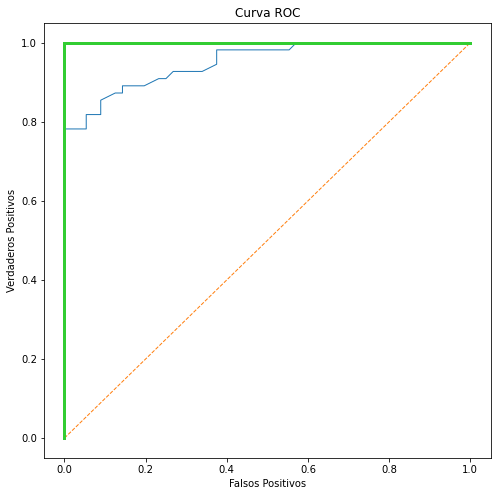

In [83]:
#Random Forest
curva_roc(rf_class,Xc_test,yc_test)

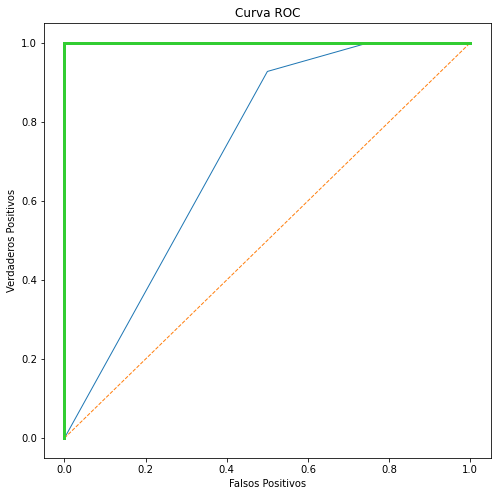

In [84]:
#KNN
curva_roc(knn_r,Xc_testknn,yc_test)

##### Discusiones.

##### Conclusión.

###### Referencias:

Alpaydin, E. (2014). Introduction to Machine Learning. The MIT Press.

Amazon. 2022. Amazon Machine Learning: Guía para desarrolladores. https://docs.aws.amazon.com/es_es/machine-learning/latest/dg/cross-validation.html

Breiman, L. (2001). Random Forests

Gelman, A., Hill, J. (2007). Data Analysis Using Regression And Multilevel/Hierarchical Models. Capítulo 3. Cambridge, UK: Cambridge UniversityPress.

Hastie, T; Tibshirani, R ; FriedmanThe, J. (2009). Elements of Statistical Learning. Data Mining, Inference, and Prediction. Second Edition. Editor Springer.

Kuhn, M., & Johnson, K. (2013). Applied predictive modeling (Vol. 26). New York: Springer

Le, J. 2018. R Decision Trees Tutorial. https://www.datacamp.com/tutorial/decision-trees-R
    
Marín, J. (2019). Desarrollo de un algoritmo con Machine Learning para la clasificacón de pacientes con Parkinson. [Máster Universitario en Bioinformática y biología computacional]. Universidad Autónoma de Madrid.

Navlani, A. 2019. Support Vector Machines with Scikit-learn Tutorial. https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

Nso-Roca, A. P., Cortés Castell, E., Carratalá Marco, F., & Sánchez Ferrer, F. (2021). Insulin Resistance as a Diagnostic Criterion for Metabolically Healthy Obesity in Children. Journal of pediatric gastroenterology and nutrition, 73(1), 103–109. https://doi.org/10.1097/MPG.0000000000003097

Shafi, A. 2023. K-Nearest Neighbors (KNN) Classification with scikit-learn. https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

Universidad Europea (2022). Aprendizaje supervisado y no supervisado. https://universidadeuropea.com/blog/aprendizaje-supervisado-no-supervisado/
